## SME0130 - Redes Complexas

Modelos de redes: Modelos sem escala

Professor: Francisco Aparecido Rodrigues, francisco@icmc.usp.br. <br>
Estudante: Bruno F. Bessa (num. 5881890), bruno.fernandes.oliveira@usp.br <br>
Universidade de São Paulo, São Carlos, Brasil.

In [24]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
from scipy import stats
import random

In [3]:
def ba_graph(N: int, 
             m: int = 3,
             plot: bool = True,
             file_name: str = None) -> nx.classes.graph.Graph:
    """
    Define a rede de Barbási-Albert acrescentando a uma rede aleatória novos nodos.
    Os nodos acrescentados são inseridos conforme a lógica de "associação preferencial", 
    com chance maior de serem ligados a nós com grau elevado.
    """
    
    #G = random_graph()
    #dict_degree = dict(G.degree())
    #list_k_nodes = []
    #for k_value, k_freq in dict_degree.items():
    #    for freq in range(k_freq):
    #        list_k_nodes.append(k_value)
            
    #for node in range(len(G), N-1):
    #    for conn in range(m):
    #        random_node = secrets.choice(list_k_nodes)
    #        G.add_edge(node, random_node)
    
    G = nx.barabasi_albert_graph(N, m)
            
    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)

    if plot:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Rede Barási-Albert com {} nodos, m={}".format(N, m), fontsize=15)
        plt.show(fig_net)
    
    if file_name != None:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Rede Barási-Albert com {} nodos, m={}".format(N, m), fontsize=15)
        plt.savefig("images/"+file_name)          
        plt.close(fig_net)            

    return G

def erdos_renyi(N: int, 
                p: float, 
                plot: bool = True,
                file_name: str = None) -> nx.classes.graph.Graph:
    
    """
    Define as conexões (i,j) = (j,i) para todos os pares de pontos com base em um 
    evento medida aleatória para probabilidade p, recebida como parâmetro na construção da rede.
    """
    
    G = nx.gnp_random_graph(N, p, seed=None, directed=False)
    
    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    
    # Opção de visualização da rede gerada (não utilizar para séries grandes de experimentos)
    if plot:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Erdos-Renyi Network (N={}, p={:.2f})".format(N, p), fontsize=15)
        plt.show(fig_net)
    if file_name != None:
        pos = nx.spring_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Erdos-Renyi Network (N={}, p={:.2f})".format(N, p), fontsize=15)
        plt.savefig("images/"+file_name)    
        plt.close(fig_net)
    
    return G


def watts_strogatz(N: int, 
                avg_deg: float,
                p: float, 
                plot: bool = True,
                file_name: str = None) -> nx.classes.graph.Graph:
    
    """
    """
    
    k = int(avg_deg)
    G = nx.watts_strogatz_graph(N, k, p, seed=None)
    
    # Para calcularmos medidas de distância precisaremos remover nós não conectados
    # No trecho abaixo mantemos somente o maior componente conctado da rede.
    G = G.to_undirected()
    G.remove_edges_from(nx.selfloop_edges(G))
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G = G.subgraph(Gcc[0])
    G = nx.convert_node_labels_to_integers(G, first_label=0)
    
    # Opção de visualização da rede gerada (não utilizar para séries grandes de experimentos)
    if plot:
        pos = nx.circular_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Watts-Strogatz Network (N={}, p={:.2f})".format(N, p), fontsize=15)
        plt.show(fig_net)
    if file_name != None:
        pos = nx.circular_layout(G)
        fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
        plt.suptitle("Watts-Strogatz Network (N={}, p={:.2f})".format(N, p), fontsize=15)
        plt.savefig("images/"+file_name)    
        plt.close(fig_net)
    
    return G

In [19]:
# Definições de medidas para as redes

def avg_shortest_path(G: nx.classes.graph.Graph) -> float:
    """
    Percorre todos os nodos do grafo e para cada um deles verifica o menor caminho até todos os demais.
    Retorna a média desses valoeres.
    Disclaimer: this function uses shortest_path_length build in function from NetworkX library.
    """
    dict_shortest_paths = nx.shortest_path_length(G)
    node_path_avg = []
    for node, paths in dict_shortest_paths:
        node_path_avg.append(sum(paths.values())/len(G.nodes()))
    
    return sum(node_path_avg)/len(node_path_avg)


def degree_distribution(G: nx.classes.graph.Graph) -> list:

    """
    Retorna a lista de valores de grau (k) para todos os nós da rede.
    """

    dict_degree = dict(G.degree())
    list_k = []
    for node, k_value in dict_degree.items():
        list_k.append(k_value)    
    
    return list_k

def eigenvector_centrality(G: nx.classes.graph.Graph) -> list:

    x = list(dict(nx.nx.eigenvector_centrality(G, max_iter=1000)).values())
    return x

def betweeness_centrality(G: nx.classes.graph.Graph) -> list:
    
    b = list(nx.betweenness_centrality(G).values())
    return b

def momment_of_degree_distribution2(G: nx.classes.graph.Graph, m: int) -> float:
    """
    Moment of order m
    """
    
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

def clustering_coef_distribution(G: nx.classes.graph.Graph) ->list:
    
    """
    Retorna a lista de valores de cluster coefficient (cc) para todos os nós da rede.

    """
    
    list_cc_nodes = []
    for node in G.nodes():
        list_cc_nodes.append(nx.clustering(G, node))

    return list_cc_nodes
        
def spl_distribution(G: nx.classes.graph.Graph) ->list:
    """
    Retorna a lista de valores de shortest path length (spl) para todos os nós da rede.

    """    
    
    N = len(G)
    if nx.is_connected(G) == True:
        distance_matrix = np.zeros(shape=(N,N)) 
        diameter = nx.diameter(G)
        slp_values = []        
        for i in np.arange(0,N):
            for j in np.arange(i+1, N):
                if(i != j):
                    aux = nx.shortest_path(G,i,j)
                    dij = len(aux)-1
                    distance_matrix[i][j] = dij
                    distance_matrix[j][i] = dij
                    slp_values.append(dij)        
        return slp_values
    else:
        pass
    
def shannon_entropy(G: nx.classes.graph.Graph) ->float:
    
    """
    Calcula a entropia de Shannon para um grafo G recebido como parâmetro.
    """
    list_k = degree_distribution(G)
    min_k = np.min(list_k)
    max_k = np.max(list_k)

    k_values= np.arange(0,max_k+1) 
    k_prob = np.zeros(max_k+1) 
    for k in list_k:
        k_prob[k] = k_prob[k] + 1
    k_prob = k_prob/sum(k_prob)
    
    H = 0
    for p in k_prob:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)


def complexity_coefficient(G):
    return momment_of_degree_distribution(G, 2)/momment_of_degree_distribution(G,1)


def distribution_plot(list_values: list,
                     plot_title: str = "Histograma de densidade",
                     var_name: str = "Variável",
                     file_name: str = None) -> None:
    """
    Produz histgrama de uma medida recebida na forma de lista.
    """
    
    avg_value = np.mean(list_values) 
    var_value = np.var(list_values)
    
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(list_values, density=True)
    ax.set_xlabel(var_name)
    ax.set_ylabel("Densidade de probabilidade")
    ax.set_title("{} de {}: média={:.2f}, var={:.2f}".format(plot_title, 
                                                             var_name, 
                                                             avg_value, 
                                                             var_value), 
                                                             fontsize=15)
    plt.show(True)
    if file_name != None:
        fig.savefig("images/"+file_name)
        
def correlation_plot(x: list, 
                         y: list, 
                         x_label: str = "x", 
                         y_label: str = "y", 
                         file_name: str = None) -> None:
    """
    Produz gráfico de dispersão de duas variáveis x e y recebidas na forma de listas.
    Calcula correlação de Pearson e Spearman para x e y.
    """    
    
    pearson_corr = np.corrcoef(x, y)[0,1]
    spearman_corr, spearman_pval = scipy.stats.spearmanr(x, y)
    
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title("Dispersão de {} e {}: Pearson: {:.2f}, Spearman: {:.2f} (p-val: {:.3f})".format(x_label, 
                                                                                           y_label,
                                                                                           pearson_corr,
                                                                                           spearman_corr,
                                                                                           spearman_pval), 
                                                                                           fontsize=15)
    plt.show(True)
    if file_name != None:
        fig.savefig("images/"+file_name)
        
def simple_plot2d(x: list, 
                     y: list, 
                     x_label: str = "x", 
                     y_label: str = "y", 
                     file_name: str = None) -> None:
    """
    Produz gráfico simples com associação entre suas variáveis x e y recebidas na forma de listas.
    """    
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title("Dispersão de {} e {}".format(x_label, y_label, fontsize=15))
    plt.show(True)
    if file_name != None:
        fig.savefig("images/"+file_name)
        



## Questions

<b>1 - Calcule a média do coeficiente aglomeração e segundo momento do grau para uma rede BA com grau médio igual a 10 e N=1000.</b>

Usando $$int( \frac{<k>}{2})$$

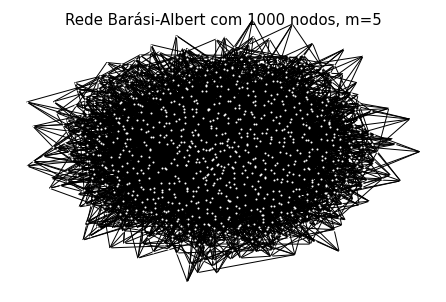

In [68]:
G = ba_graph(N=1000, m=int(10/2))

In [71]:
avg_clust_coef = np.mean(clustering_coef_distribution(G)[0])
sec_moment_deg = momment_of_degree_distribution2(G, 2)

print("Cluster coefficient médio: {:.2f}".format(avg_clust_coef))
print("Segundo momento do grau: {:.2f}".format(sec_moment_deg))

Cluster coefficient médio: 0.03
Segundo momento do grau: 191.16


<b>2 - Considere uma rede aleatória (Erdos-Renyi) e uma rede BA com N=1000 vértices e grau médio 10. Qual o valor da entropia de Shannon da distribuição do grau para essas redes?</b>



Usaremos a seguinte propriedade de redes aleatórias: $$ p = \frac{k}{(N-1)} $$

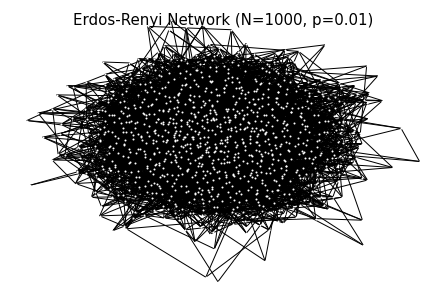

In [75]:
G_ER = erdos_renyi(N=1000, p=10/999)

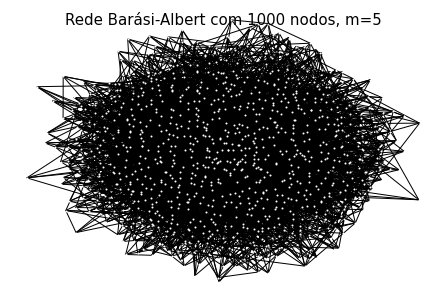

In [76]:
G_BA = ba_graph(N=1000, m=int(10/2))

In [78]:
S_ER = shannon_entropy(G_ER)
S_BA = shannon_entropy(G_BA)

print("Entropia de Shannon (N=1000 ,<k>=10): H(ER)={:.1f}; H(BA)={:.1f}".format(S_ER, S_BA))

Entropia de Shannon (N=1000 ,<k>=10): H(ER)=3.7; H(BA)=3.6


<b>3 - Considere o modelo de Barabási-Albert com N=1000 e grau médio igual a 10. Calcule o coeficiente de correlação de Pearson (rho) entre o grau e a medida eigenvector centrality. O que esse valor indica?</b>

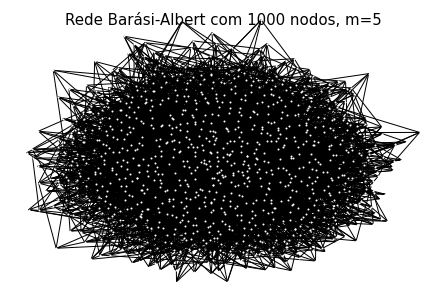

In [5]:
G = ba_graph(N=1000, m=int(10/2))

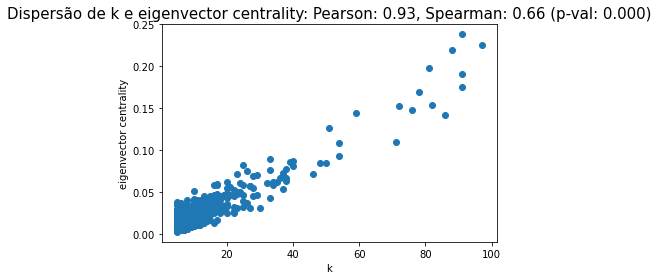

In [15]:
x = degree_distribution(G)
y = eigenvector_centrality(G)

correlation_plot(x, y, "k", "eigenvector centrality")

<b>4 - Calcule a correlação entre a medida betweeness centrality e o grau para uma rede BA. Considere N=500 e grau médio 10.</b>

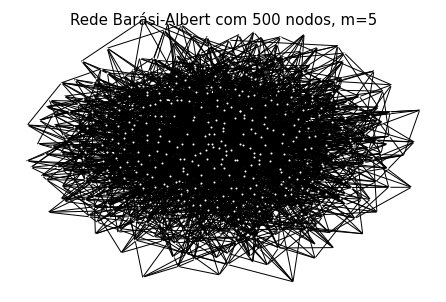

In [22]:
G = ba_graph(N=500, m=int(10/2))

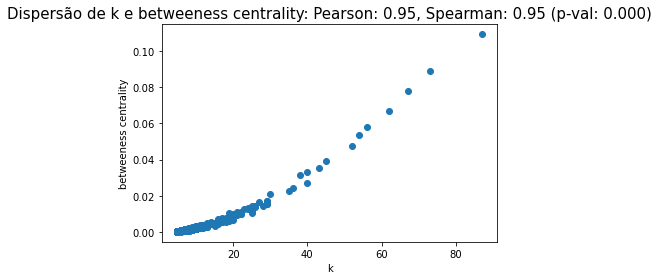

In [23]:
x = degree_distribution(G)
y = betweeness_centrality(G)

correlation_plot(x, y, "k", "betweeness centrality")

<b>5 - Calcule o segundo momento do grau para o modelo de configuração com a=3 (coeficiente da lei de potência (Zipf)). Considere N=500 e o valor mais próximo, pois os valores podem variar de uma simulação para outra.</b>

Segundo momento do grau: 33.65


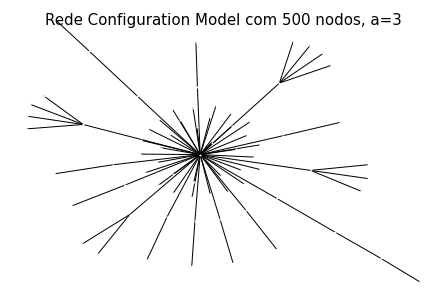

In [32]:
N = 500
a = 3
seq = np.random.zipf(a, N) #Zipf distribution


if(sum(seq)%2 != 0): # the sum of stubs have to be even
    pos = random.randint(0, len(seq))
    seq[pos] = seq[pos]+ 1

G = nx.configuration_model(seq)

G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

d = dict(G.degree())
pos = nx.spring_layout(G)
fig_net = nx.draw(G, pos, node_color='w', node_size=1, with_labels=False)
plt.suptitle("Rede Configuration Model com {} nodos, a={}".format(N, a), fontsize=15)

sec_moment_deg = momment_of_degree_distribution2(G, 2)
print("Segundo momento do grau: {:.2f}".format(sec_moment_deg))

# Não entendi o resultado sugerido no questionário (171)